# Pengumpulan Data
Mengumpulkan data yang meliputi: id_pasien, tanggal_kunjungan, jenis perawatan, jenis_pembayaran, gender, status_kawin, status_rujukan, usia_pasien, diagnosa, lama_perawatan, total_biaya.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame dengan data yang diberikan
# data = {
#     'id_pasien': [1, 2, 3, 4, 5],
#     'tanggal_kunjungan': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
#     'jenis_perawatan': ['Rawat Inap', 'Rawat Jalan', 'Rawat Inap', 'Rawat Jalan', 'Rawat Inap'],
#     'jenis_pembayaran': ['Asuransi', 'Pribadi', 'Asuransi', 'Pribadi', 'Asuransi'],
#     'gender': ['L', 'P', 'L', 'P', 'L'],
#     'status_kawin': ['Menikah', 'Belum Menikah', 'Menikah', 'Belum Menikah', 'Menikah'],
#     'status_rujukan': ['Rujukan', 'Non-Rujukan', 'Rujukan', 'Non-Rujukan', 'Rujukan'],
#     'usia_pasien': [45, 34, 56, 23, 67],
#     'diagnosa': ['Diabetes', 'Hipertensi', 'Diabetes', 'Hipertensi', 'Diabetes'],
#     'lama_perawatan': [5, 2, 7, 1, 10],
#     'total_biaya': [5000000, 2000000, 7000000, 1000000, 10000000]
# }

file_path = 'data-pasien.xlsx'  # Ganti dengan path file Excel yang sesuai
data = pd.read_excel(file_path)

df = pd.DataFrame(data)

# Menampilkan DataFrame
df

,id_pasien,nama_pasien,rm,tanggal_kunjungan,jenis_perawatan,jenis_pembayaran,gender,status_kawin,status_rujukan,usia_pasien,diagnosa,lama_perawatan,total_biaya
0,57890,IKBAL MAULANA,90001,2021-09-12,IGD,Umum,L,Menikah,Rujukan,45,A01,5,5000000
1,57891,RIO TUMANGGER,90002,2021-09-12,IGD,BPJS,L,Menikah,Non-Rujukan,34,B01,2,2000000
2,57224,TINA WANTI SEMBIRING,84330,2021-09-12,Rawat Inap,BPJS,P,Menikah,Rujukan,56,A02,7,7000000
3,24740,nurhaidah,37865,2021-09-12,Rawat Inap,BPJS,P,Belum Menikah,Non-Rujukan,23,D01,1,1000000
4,56241,MAINUR BOANG MANALU,83302,2021-09-12,Rawat Inap,BPJS,P,Menikah,Rujukan,67,Z01,10,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,36511,jubaedah,51008,2021-09-13,Rawat Jalan,BPJS,P,Menikah,Rujukan,22,A01,1,792212
66,11424,HERIANTO,23367,2021-09-13,Rawat Jalan,BPJS,L,Menikah,Rujukan,60,A01.1,1,983089
67,39166,salidin berutu,55235,2021-09-13,Rawat Jalan,BPJS,L,Menikah,Non-Rujukan,52,A01.2,1,1472592
68,52837,amril sahputra bako,79184,2021-09-13,Rawat Jalan,BPJS,L,Menikah,Non-Rujukan,50,A01.3,1,2999422


# Pra-pemrosesan Data
Melakukan pra-pemrosesan data seperti pembersihan data, penanganan nilai hilang, dan transformasi data.

In [4]:
# Mengubah tipe data kolom 'tanggal_kunjungan' menjadi datetime
df['tanggal_kunjungan'] = pd.to_datetime(df['tanggal_kunjungan'])

# Menangani nilai hilang dengan mengisi nilai hilang dengan nilai default
df.fillna({
    'jenis_perawatan': 'Tidak Diketahui',
    'jenis_pembayaran': 'Tidak Diketahui',
    'gender': 'Tidak Diketahui',
    'status_kawin': 'Tidak Diketahui',
    'status_rujukan': 'Tidak Diketahui',
    'usia_pasien': df['usia_pasien'].mean(),
    'diagnosa': 'Tidak Diketahui',
    'lama_perawatan': df['lama_perawatan'].mean(),
    'total_biaya': df['total_biaya'].mean()
}, inplace=True)

# Mengubah kolom kategorikal menjadi tipe 'category'
categorical_columns = ['jenis_perawatan', 'jenis_pembayaran', 'gender', 'status_kawin', 'status_rujukan', 'diagnosa']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Menampilkan DataFrame setelah pra-pemrosesan
df

,id_pasien,nama_pasien,rm,tanggal_kunjungan,jenis_perawatan,jenis_pembayaran,gender,status_kawin,status_rujukan,usia_pasien,diagnosa,lama_perawatan,total_biaya
0,57890,IKBAL MAULANA,90001,2021-09-12,IGD,Umum,L,Menikah,Rujukan,45,A01,5,5000000
1,57891,RIO TUMANGGER,90002,2021-09-12,IGD,BPJS,L,Menikah,Non-Rujukan,34,B01,2,2000000
2,57224,TINA WANTI SEMBIRING,84330,2021-09-12,Rawat Inap,BPJS,P,Menikah,Rujukan,56,A02,7,7000000
3,24740,nurhaidah,37865,2021-09-12,Rawat Inap,BPJS,P,Belum Menikah,Non-Rujukan,23,D01,1,1000000
4,56241,MAINUR BOANG MANALU,83302,2021-09-12,Rawat Inap,BPJS,P,Menikah,Rujukan,67,Z01,10,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,36511,jubaedah,51008,2021-09-13,Rawat Jalan,BPJS,P,Menikah,Rujukan,22,A01,1,792212
66,11424,HERIANTO,23367,2021-09-13,Rawat Jalan,BPJS,L,Menikah,Rujukan,60,A01.1,1,983089
67,39166,salidin berutu,55235,2021-09-13,Rawat Jalan,BPJS,L,Menikah,Non-Rujukan,52,A01.2,1,1472592
68,52837,amril sahputra bako,79184,2021-09-13,Rawat Jalan,BPJS,L,Menikah,Non-Rujukan,50,A01.3,1,2999422


# Eksplorasi Data
Melakukan eksplorasi data untuk memahami distribusi dan hubungan antar variabel menggunakan statistik deskriptif dan visualisasi.

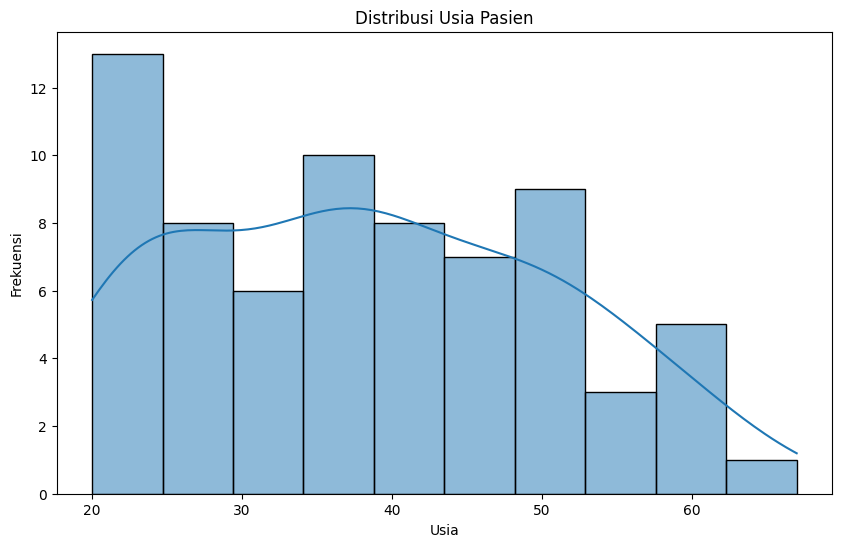

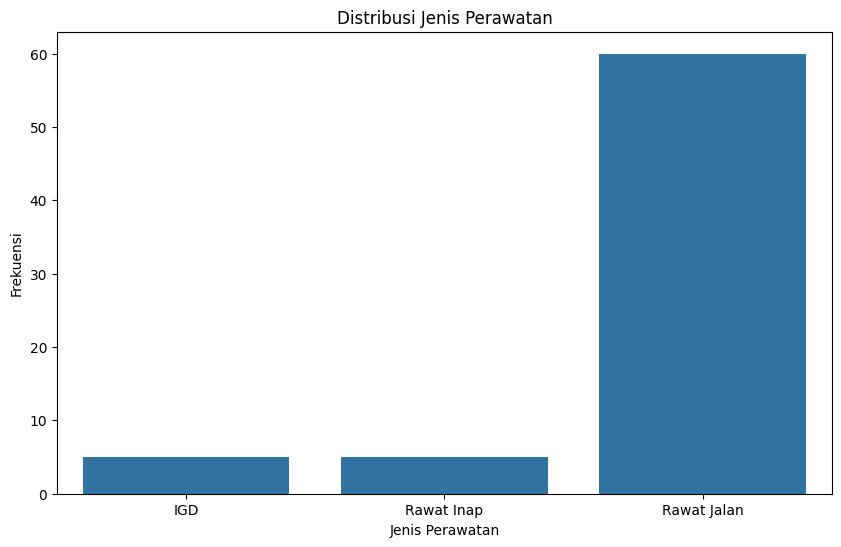

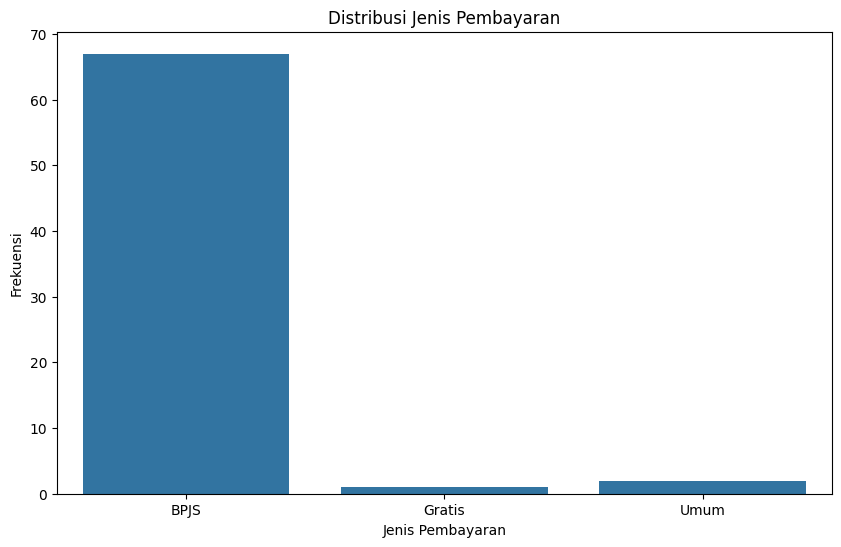

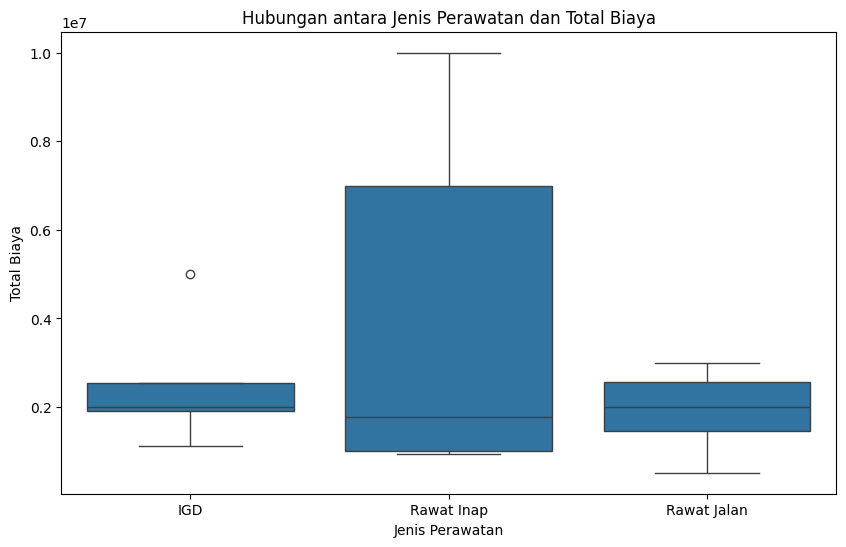

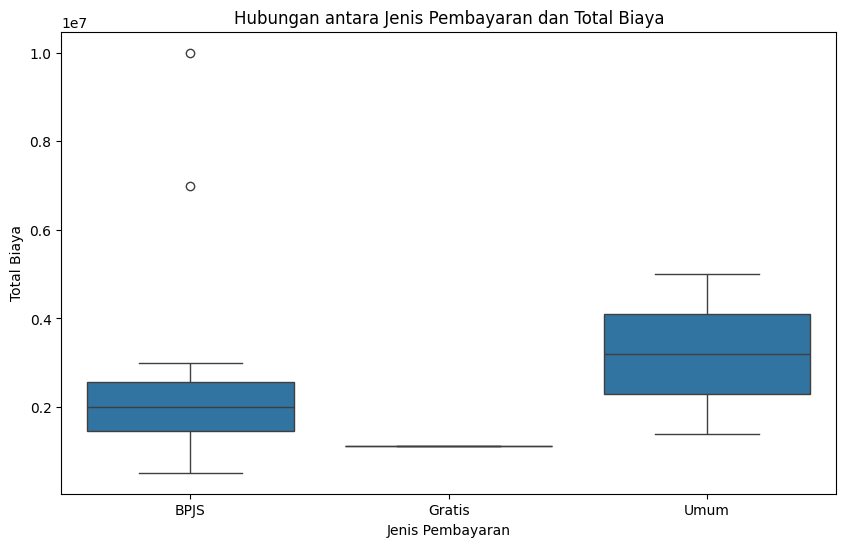

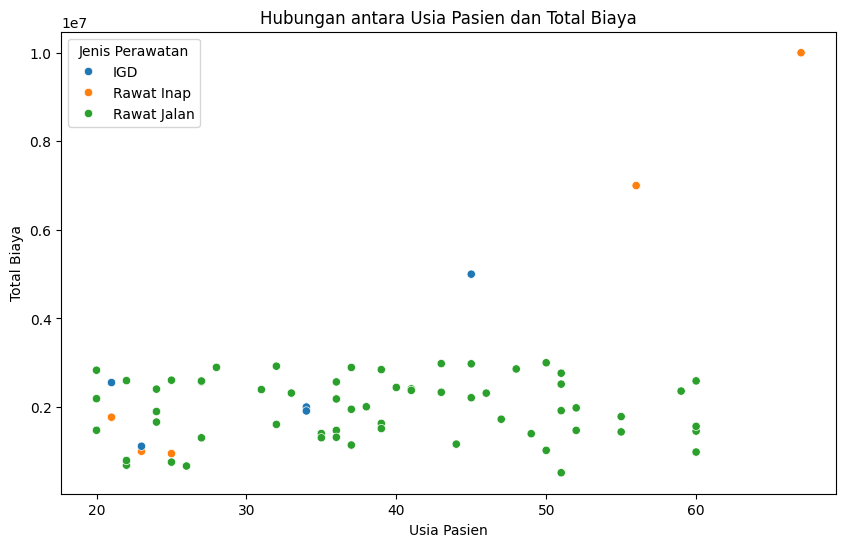

In [5]:
# Statistik deskriptif untuk kolom numerik
df.describe()

# Statistik deskriptif untuk kolom kategorikal
df.describe(include=['category'])

# Distribusi usia pasien
plt.figure(figsize=(10, 6))
sns.histplot(df['usia_pasien'], bins=10, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi jenis perawatan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='jenis_perawatan')
plt.title('Distribusi Jenis Perawatan')
plt.xlabel('Jenis Perawatan')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi jenis pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='jenis_pembayaran')
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara jenis perawatan dan total biaya
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='jenis_perawatan', y='total_biaya')
plt.title('Hubungan antara Jenis Perawatan dan Total Biaya')
plt.xlabel('Jenis Perawatan')
plt.ylabel('Total Biaya')
plt.show()

# Hubungan antara jenis pembayaran dan total biaya
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='jenis_pembayaran', y='total_biaya')
plt.title('Hubungan antara Jenis Pembayaran dan Total Biaya')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Total Biaya')
plt.show()

# Hubungan antara usia pasien dan total biaya
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='usia_pasien', y='total_biaya', hue='jenis_perawatan')
plt.title('Hubungan antara Usia Pasien dan Total Biaya')
plt.xlabel('Usia Pasien')
plt.ylabel('Total Biaya')
plt.legend(title='Jenis Perawatan')
plt.show()

# Pemodelan Data
Membangun model data untuk menganalisis jumlah pasien berdasarkan jenis perawatan dan jenis pembayaran.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Memilih fitur dan target
X = df[['jenis_perawatan', 'jenis_pembayaran', 'gender', 'status_kawin', 'status_rujukan', 'usia_pasien', 'diagnosa', 'lama_perawatan']]
y = df['total_biaya']

# Mengubah fitur kategorikal menjadi dummy variables
X = pd.get_dummies(X, drop_first=True)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# Evaluasi Model
Mengevaluasi kinerja model menggunakan metrik evaluasi yang sesuai.

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Menampilkan evaluasi model
print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2449158993254.0713
R-squared (R2): 0.5275500255403094

Evaluasi Model:
Mean Squared Error (MSE): 2449158993254.0713
R-squared (R2): 0.5275500255403094


# Interpretasi Hasil
Menginterpretasikan hasil dari model yang telah dibangun.

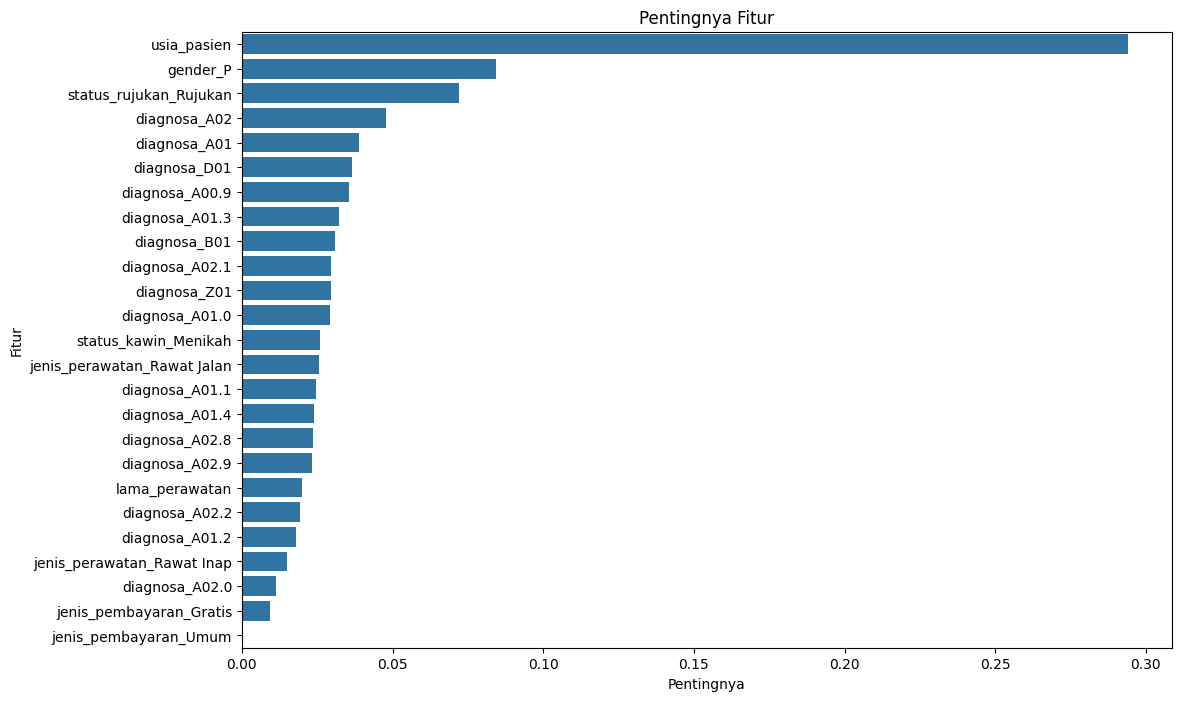

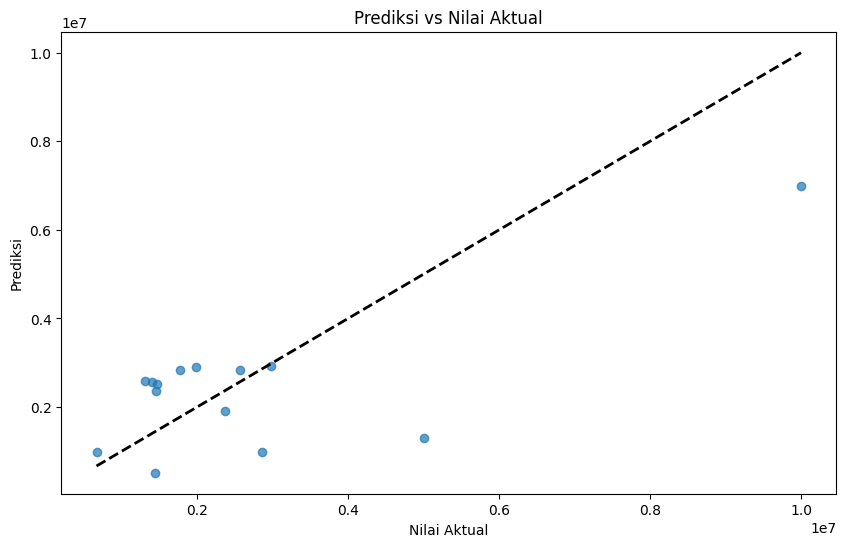

,Nilai Aktual,Prediksi
22,1981079,2895540
0,5000000,1306262
49,667773,983089
4,10000000,7000000
54,2375412,1918218
18,1401710,2566510
10,2572297,2831173
33,2975507,2921951
45,1455907,2359748
12,1437762,516157


In [8]:
# Interpretasi Hasil

# Menampilkan pentingnya fitur
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Fitur': features, 'Pentingnya': importances})
feature_importance_df = feature_importance_df.sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df)
plt.title('Pentingnya Fitur')
plt.xlabel('Pentingnya')
plt.ylabel('Fitur')
plt.show()

# Menampilkan prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Prediksi vs Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.show()

# Menyimpan hasil ke file Excel
df_hasil = pd.DataFrame({'Nilai Aktual': y_test, 'Prediksi': y_pred})
df_hasil.to_excel('hasil_prediksi.xlsx', index=False)

# Menampilkan DataFrame hasil
df_hasil

# Visualisasi Data
Menampilkan berbagai macam grafik untuk memvisualisasikan data dan hasil analisis.

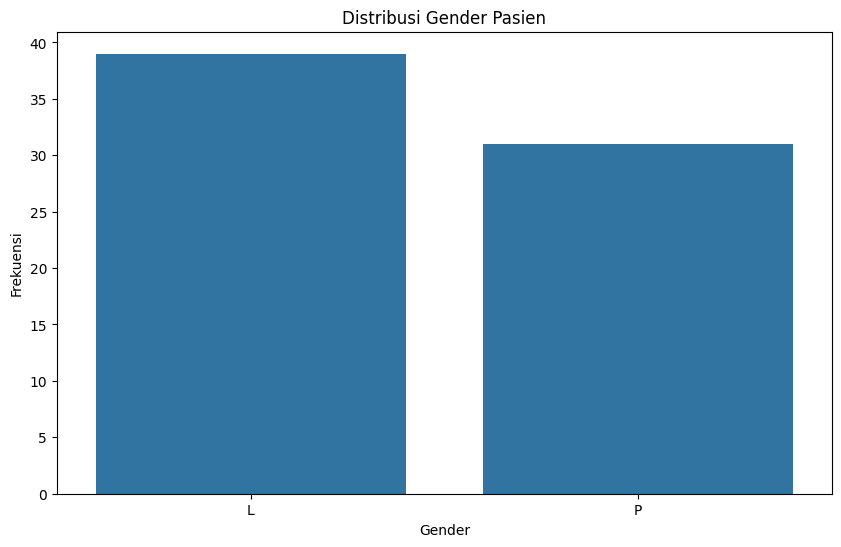

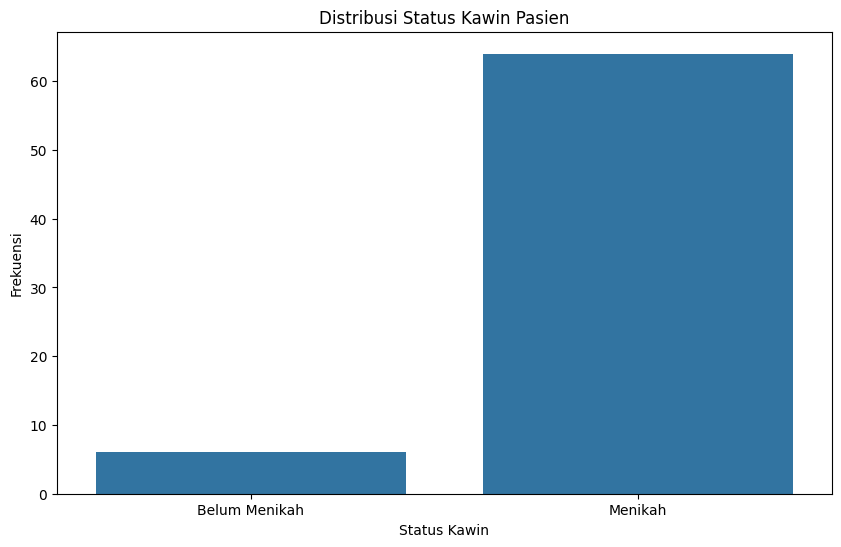

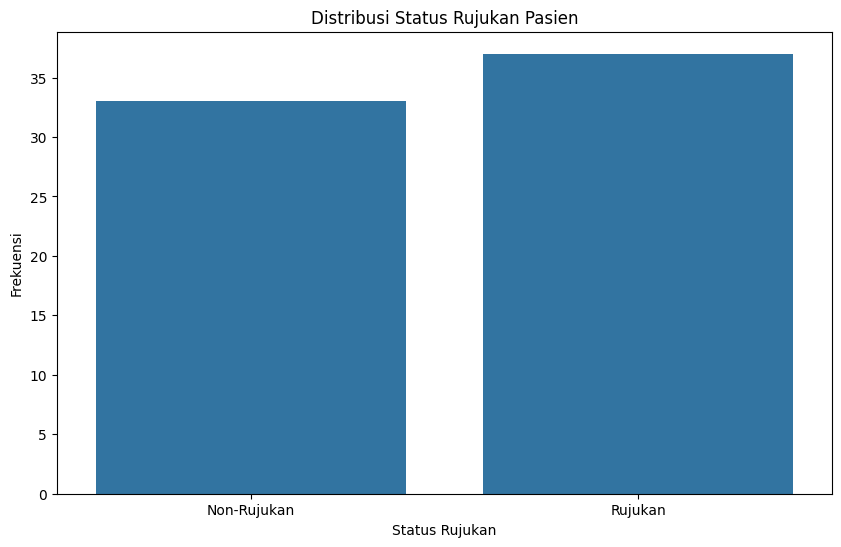

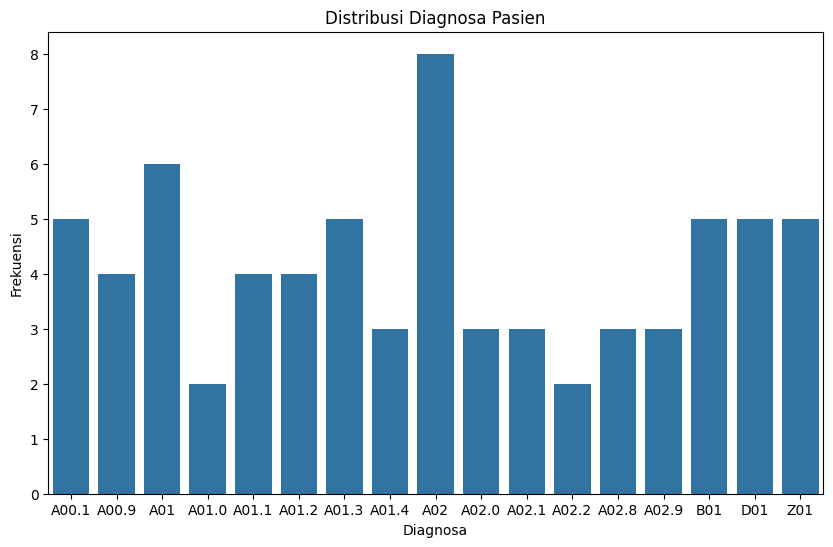

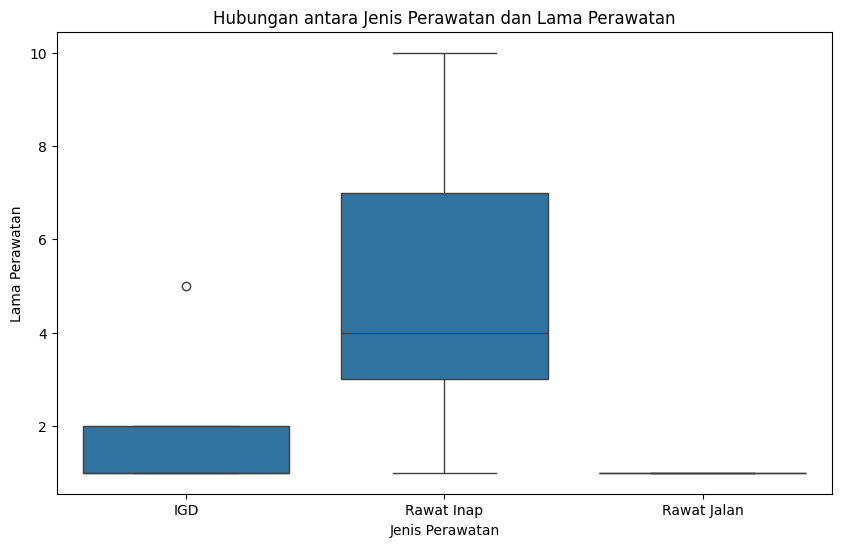

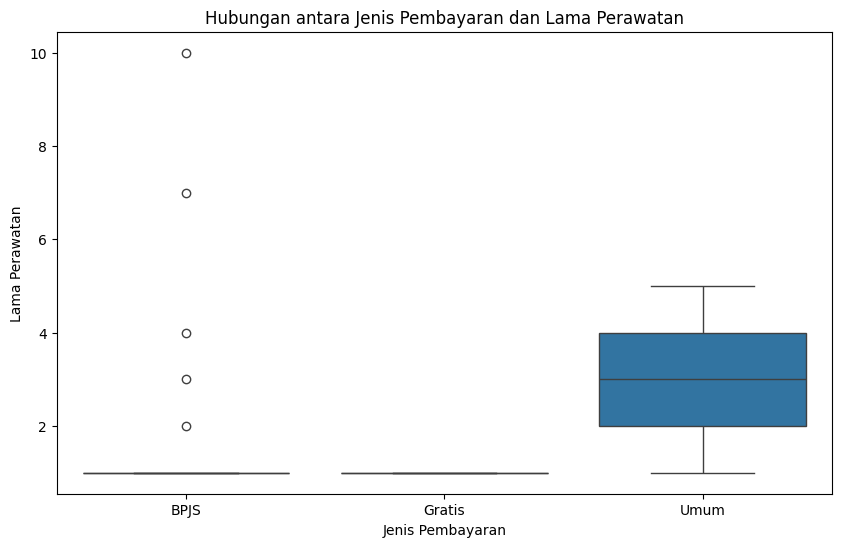

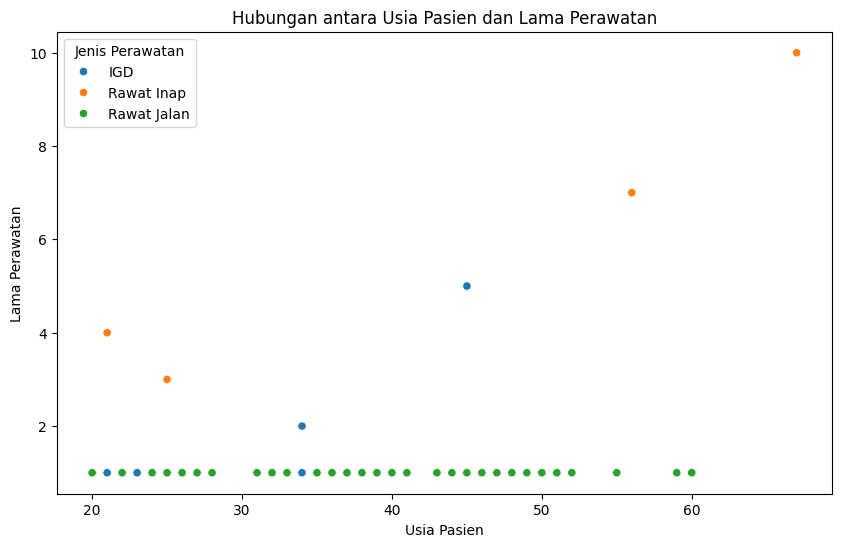

In [9]:
# Visualisasi Data

# Distribusi gender pasien
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender')
plt.title('Distribusi Gender Pasien')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi status kawin pasien
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status_kawin')
plt.title('Distribusi Status Kawin Pasien')
plt.xlabel('Status Kawin')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi status rujukan pasien
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status_rujukan')
plt.title('Distribusi Status Rujukan Pasien')
plt.xlabel('Status Rujukan')
plt.ylabel('Frekuensi')
plt.show()

# Distribusi diagnosa pasien
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diagnosa')
plt.title('Distribusi Diagnosa Pasien')
plt.xlabel('Diagnosa')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara jenis perawatan dan lama perawatan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='jenis_perawatan', y='lama_perawatan')
plt.title('Hubungan antara Jenis Perawatan dan Lama Perawatan')
plt.xlabel('Jenis Perawatan')
plt.ylabel('Lama Perawatan')
plt.show()

# Hubungan antara jenis pembayaran dan lama perawatan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='jenis_pembayaran', y='lama_perawatan')
plt.title('Hubungan antara Jenis Pembayaran dan Lama Perawatan')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Lama Perawatan')
plt.show()

# Hubungan antara usia pasien dan lama perawatan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='usia_pasien', y='lama_perawatan', hue='jenis_perawatan')
plt.title('Hubungan antara Usia Pasien dan Lama Perawatan')
plt.xlabel('Usia Pasien')
plt.ylabel('Lama Perawatan')
plt.legend(title='Jenis Perawatan')
plt.show()

# Ekspor ke Excel
Mengekspor hasil analisis dan visualisasi ke file Excel.

In [10]:
import pandas as pd

# Mengekspor DataFrame hasil analisis ke file Excel
with pd.ExcelWriter('hasil_analisis.xlsx') as writer:
    df.to_excel(writer, sheet_name='Data Asli', index=False)
    df_hasil.to_excel(writer, sheet_name='Hasil Prediksi', index=False)
    feature_importance_df.to_excel(writer, sheet_name='Pentingnya Fitur', index=False)

# Menampilkan pesan bahwa ekspor telah selesai
print("Ekspor ke file Excel telah selesai.")

Ekspor ke file Excel telah selesai.
